# Statistical Inference

In this notebook we will be examining whether linear relationships exist between input and output using statistical methods.

## Hypothesis Tests

Hypothesis tests are tests which determines whether there is a relationship between in- and output. The *null hypothesis* is defined as:

$H_0: \text{There is no relationship between X and y}$

The *alternative hypothesis* is defined as:

$H_{\alpha}: \text{There is some relationship between X and y}$

For simple linear regression this coincides with testing whether $\theta_1=0$ because if $\theta_1$ is 0 then there is no linear relation and X doesn't change with different y. For multiple linear regression this coincides with all thetas except $\theta_0$ being 0

## t-statistic

In practice we want to how know confident we should be that $\theta_1$ isn't $0$ so that there is a relationship. This can be done using the *t-statistic* which is defined as:

\begin{equation*}
t = \frac{\theta_1-0}{\text{SE}(\theta_1)}
\end{equation*}

Which is essentially how many standard deviations that $\theta_1$ is from 0. 

## p-value

The p value is simply the probability of observing a value larger than $|t|$ which can be found using the area under a normal distribution of the standard error. If the p-value is small then it is unlikely for there to be a relationship between the predictor and responder due to chance. This is called rejecting the null hypothesis. This is usually done when p<1% or p<5%. 

Now lets do a hypothesis test for simple linear regression.

In [1]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [2]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

lin_reg = LinearRegression() #apply model and make predictions
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
thetas = np.array([lin_reg.intercept_,lin_reg.coef_]) #get thetas

X_b = np.c_[ np.ones(( 100, 1)), X]  
sigma_squared = 1/(len(y)-2)*((y-y_pred)**2).sum() 
var_cov_matrix = sigma_squared * np.linalg.inv(X_b.T.dot(X_b)) 
standard_errors = np.sqrt(np.diagonal(var_cov_matrix)).reshape(-1,1) #get standard errors

t_stats = np.divide(thetas,standard_errors) #get t-statistic

distributer = lambda x: 1-stats.norm.cdf(x)
vfunc = np.vectorize(distributer)
p_values = vfunc(t_stats) #get p-values

In [3]:
import pandas as pd

df = pd.DataFrame(np.concatenate((thetas, standard_errors, t_stats, p_values),axis=1), 
                  columns=['Coefficient','Standard Error','t-statistic','p_value'])
df.style.hide_index()

Here we can see there is a very high probability that there is a linear relationship between x and y since the p value is very small. This can be seen by plotting the data:

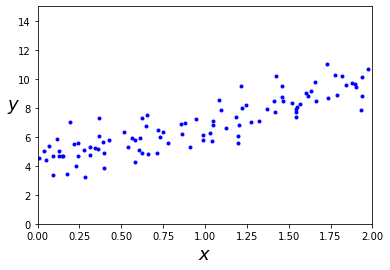

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## F-statistic

The t-statistic can be used to determine whether a single variable is statistically significant, the F-statistic determines whether a group of variables are statistically significant. To test this we check if the variance between a group of variables is the same as the variance within groups. This ratio can be determined with the following formula:

\begin{equation*}
F = \frac{\text{TSS}-\text{RSS}}{\text{RSS}/(n-p-1)}
\end{equation*}

Alternatively it can be found from the f-distribution with given n and p-values with the help of statistical software.

Here we can apply it with multiple linear regression.

In [5]:
import numpy as np
np.random.seed(42)

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
z = 3*x + y + np.random.randn(100,1)

Text(0.5, 0, 'z')

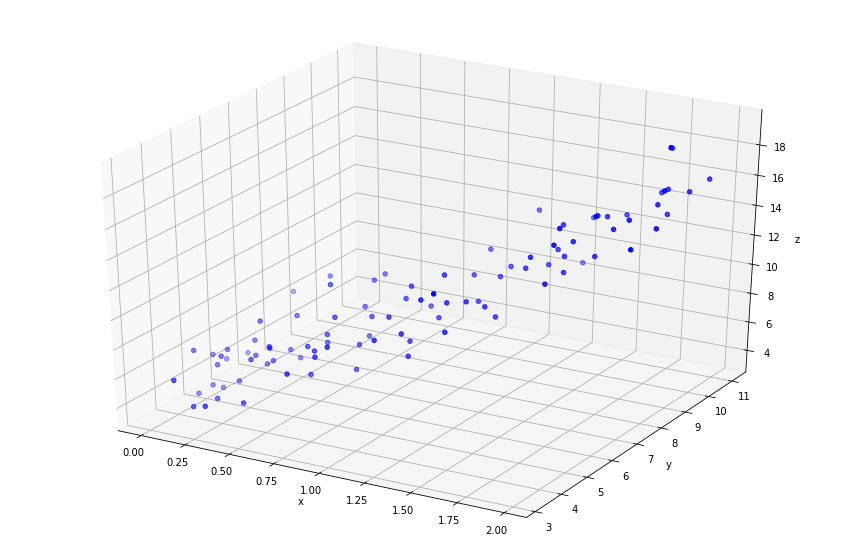

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='b')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [7]:
x_b = np.c_[ np.ones(( 100, 1)), x] # add bias vector of 1s
X = np.c_[x_b,y]

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(z)

z_pred = theta_hat[0][0] + theta_hat[1][0]*x + theta_hat[2][0]*y
theta_hat

array([[0.14679242],
       [3.08025159],
       [0.97281755]])

In [8]:
TSS = (z_pred**2).sum()
RSS = ((z-z_pred)**2).sum()
F_stat = ((TSS-RSS)/2)/(RSS/(100-2-1))
F_stat

4270.679959745447

Since the F-statistic is large it means there is very high probability there is a relationship between the predictor and responder and the null hypothesis can be rejected. If it was near 1 the alternative hypothesis would be rejected.

## Correlation Matrix

A correlation matrix looks at how different variables depend and correlate to one another. The definition for correlation is:

\begin{equation*}
\text{Cor}(x,y)=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}}
\end{equation*}

For a simple linear equation it can be shown that the square of the correlation is equal to the $R^2$. The closer to 1 the higher the linear correlation is. For multiple linear regression you can check the correlation between variables in a so called correlation matrix.

In [9]:
import numpy as np
np.random.seed(42)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [10]:
numerator = ((X-X.mean())*(y-y.mean())).sum()
denominator = np.sqrt(((X-X.mean())**2).sum())*np.sqrt(((y-y.mean())**2).sum())
correlation = numerator/denominator
correlation

0.8770824028342048